# Seminar 4. Classification & Cross-validation

#### Regression & model complexity lectures recap

# Examples of supervised DS problems

## Iris Data Set
https://archive.ics.uci.edu/ml/datasets/Iris

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant

This is perhaps the best known database to be found in the pattern recognition literature. 

Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) 




** Inputs // Features // X**: Flower sizes  
  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  
<div style="width:25%; text-align:center">
<img src="http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png" width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

** Output // Target // Y**: Type of iris plant
 - Iris Setosa 
 - Iris Versicolour 
 - Iris Virginica
 
<div style="width:100%; text-align:center">
<img src="http://articles.concreteinteractive.com/wp-content/uploads/2015/03/irises.png" width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

##  Shuttle Landing Control Data Set
https://archive.ics.uci.edu/ml/datasets/Shuttle+Landing+Control

Determining the conditions under which an autolanding would be preferable to manual control of the spacecraft.

<div style="width:30%; text-align:center">
<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large92.jpg" width=500px>
</div>

** Inputs // Features // X**: Flight conditions  

2. STABILITY: stab, xstab 
3. ERROR: XL, LX, MM, SS 
4. SIGN: pp, nn 
5. WIND: head, tail 
6. MAGNITUDE: Low, Medium, Strong, OutOfRange 
7. VISIBILITY: yes, no



** Output // Target // Y**: Type of control

Auto or manual landing


## Mice Protein Expression Data Set
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

- The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of cortex.
- There are 38 control mice and 34 trisomic mice (Down syndrome). 
- In the experiments, 15 measurements were registered of each protein per sample/mouse. 
- Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. So, the dataset contains a total of 1080 measurements per protein. 
- Each measurement can be considered as an independent sample/mouse. 

Classes: 
 - c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
 - c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
 - c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
 - c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

 - t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
 - t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
 - t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
 - t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

** Inputs // Features // X**: the expression levels of 77 proteins 

** Output // Target // Y**: Control or trisomy

## Exploring the *Titanic* dataset (continued)

<div style="width:100%; text-align:center">
<img src="http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" width=500px>
</div>

Kaggle has a nice [dataset](https://www.kaggle.com/c/titanic-gettingStarted) with information about passengers on the *Titanic*. It's meant as an introduction to predictive models -- here, predicting who survived the sinking. Let's explore it using [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). This notebook mostly demonstrates features in development for version 0.3. Please [get in touch](https://github.com/mwaskom/seaborn/issues/new) if you have ideas for how they could be improved.

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()  # apply seaborn appearance to all figures

from matplotlib import pyplot as plt
%matplotlib inline 

# ignore FutureWarning from sklearn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)
titanic["sex"] = titanic.sex.map({"male":0, "female":1})
titanic = pd.get_dummies(titanic, dummy_na=True, columns=['embarked',])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1,0
3,1,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0,0,1,0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = titanic.drop('survived', axis=1)
y = titanic.survived

In [5]:
clf = KNeighborsClassifier()
clf.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:
print(X.count())

pclass          891
sex             891
age             714
sibsp           891
parch           891
fare            891
embarked_C      891
embarked_Q      891
embarked_S      891
embarked_nan    891
dtype: int64


In [7]:
# we have to remove NaN
X.dropna(axis=0, inplace=True)
print(X.count())
y = y[X.index].values

pclass          714
sex             714
age             714
sibsp           714
parch           714
fare            714
embarked_C      714
embarked_Q      714
embarked_S      714
embarked_nan    714
dtype: int64


In [8]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_predicted = clf.predict(X)
print('Accuracy of prediction is {}'.format(accuracy_score(y, y_predicted)))

Accuracy of prediction is 0.9831932773109243


#### Bias-variance tradeoff

<div style="width:100%; text-align:center">
<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" width=500px>
</div>

Check a great tutorial http://scott.fortmann-roe.com/docs/BiasVariance.html

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_train)
print('Accuracy of prediction on train set is {}'.format(accuracy_score(y_train, y_predicted)))

Accuracy of prediction on train set is 0.9937238493723849


In [10]:
y_predicted = clf.predict(X_test)
print('Accuracy of prediction on test set is {}'.format(accuracy_score(y_test, y_predicted)))

Accuracy of prediction on test set is 0.690677966101695


### Lets try to reproduce model complexity curves
What is a measure of complexity for KNeighborsClassifier?

Text(0, 0.5, 'Accuracy of prediction')

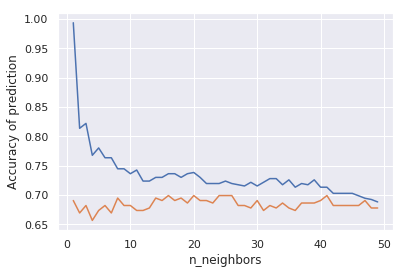

In [11]:
train_error, test_error = [], []
neighbors_range = range(1, 50)
for n_neighbors in neighbors_range:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_error.append(accuracy_score(y_train, clf.predict(X_train)))
    test_error.append(accuracy_score(y_test, clf.predict(X_test)))
plt.plot(neighbors_range, train_error)
plt.plot(neighbors_range, test_error)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy of prediction')

# Brief intro to classification algorithms

In [12]:
import seminar4_utils as utils # plot functions

## Logistic regression

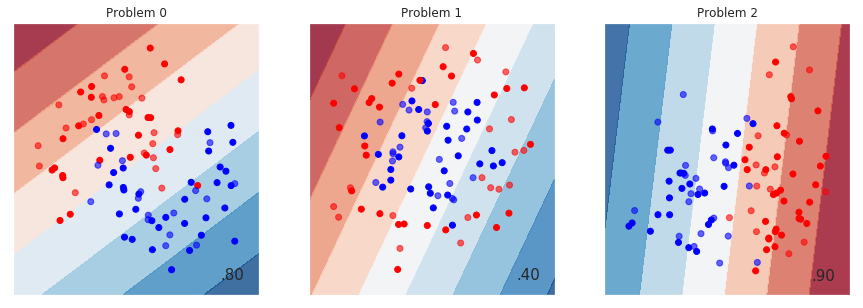

In [81]:
from sklearn.linear_model import LogisticRegression
utils.plot_clf(LogisticRegression());

## Sparcity

<div style="width:60%; text-align:center">
<img src="https://1.bp.blogspot.com/-tXq6Nl2lcNg/V3qzttiZ4sI/AAAAAAAAN_M/6nmjgwydWJUy5Kqt9gFg2Nb12BCTcD4ogCLcB/s1600/LASSO.png">
</div>

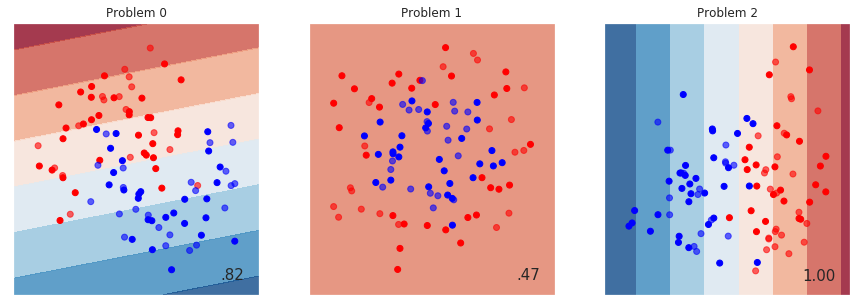

In [82]:
utils.plot_clf(LogisticRegression(C=1e-1, penalty='l1'))

## Support vector machine

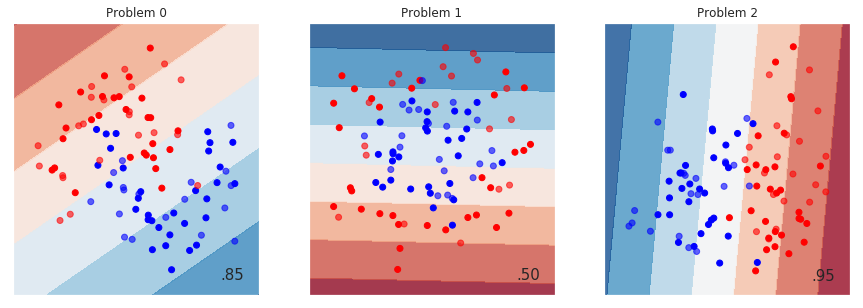

In [83]:
from sklearn.svm import SVC # SVC means Support Vector Classifier
utils.plot_clf(SVC(kernel='linear'))

** Kernel trick**. Main idea
* SVM builds a linear decision boundary in a feature space
* Some problems cannot be solved by a linear method (Problem 1 above)
* But what if we somehow transform our feature space?
* For example, use $x_1^2,\; x_1 x_2, \; x_2^2$ as features?

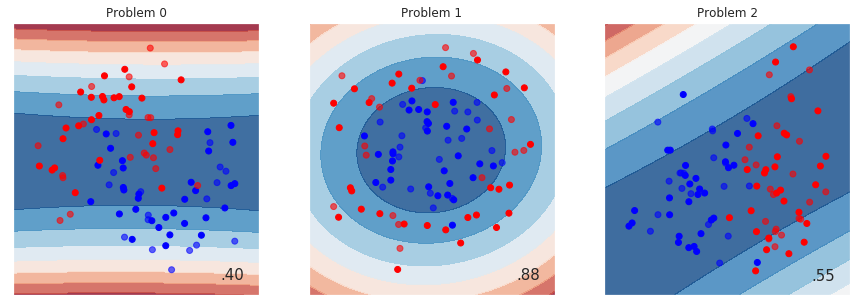

In [84]:
# reload(utils)
utils.plot_clf(SVC(kernel='poly', degree=2))

#### We can even use infinite-dimensional vector spaces!

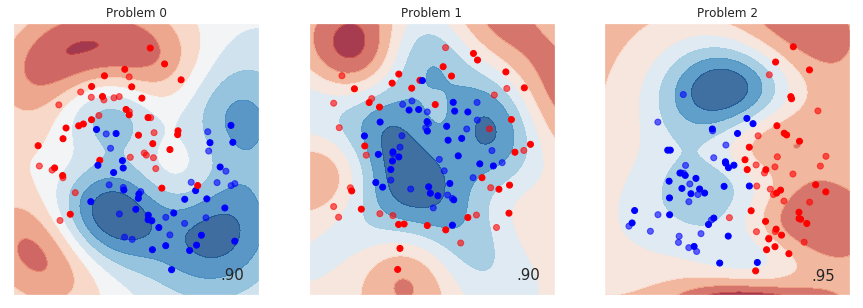

In [85]:
utils.plot_clf(SVC(kernel='rbf', C=10**4))

#  Example: Mice classification

## Mice Protein Expression Data Set
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
- The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of cortex.
- There are 38 control mice and 34 trisomic mice (Down syndrome). 
- In the experiments, 15 measurements were registered of each protein per sample/mouse. 
- Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. So, the dataset contains a total of 1080 measurements per protein. 
- Each measurement can be considered as an independent sample/mouse. 

TODO: 1. Import pandas

In [86]:
import pandas as pd

TODO: 2. Load the Mice data set (check out *pd.read_* functions) and have a look at it

*tip*: add index_col='MouseID' to your reading function to use Mouse Id as an index

In [87]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
data = pd.read_excel(url)

In [88]:
data.set_index('MouseID', inplace=True)

TODO: 3. Identify features (X) and targets (y)

In [89]:
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


TODO: 4. Split your data into X and y

*tip* you can assign data to X and drop unnecessary columns via drop() method

In [90]:
X = data.iloc[:, :77]
# X = data.loc[:, :'CaNA_N']
y = data['Genotype']

In [91]:
X.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


TODO: 5. Decode Genotype: Control as 0, Ts65Dn as 1
    
*tip* example from the titanic dataset: sex decoding

titanic.sex = titanic.sex.map({"male":0, "female":1})

In [92]:
y = y.map({"Control": 0, 'Ts65Dn': 1})

In [93]:
y.head()

MouseID
309_1    0
309_2    0
309_3    0
309_4    0
309_5    0
Name: Genotype, dtype: int64

TODO: 6. Check NA values via count() and then drop columns with NaNs via dropna()

*tip* check that you specify the correct axes to drop columns (and not rows)

In [95]:
X.count()

DYRK1A_N     1077
ITSN1_N      1077
BDNF_N       1077
NR1_N        1077
NR2A_N       1077
             ... 
SYP_N        1080
H3AcK18_N     900
EGR1_N        870
H3MeK4_N      810
CaNA_N       1080
Length: 77, dtype: int64

In [96]:
X.dropna(axis=1, inplace=True)

X.shape

(1080, 28)

# Cross-validation

In [97]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# LogisticRegressionCV automatically select regularization parameter C

In [98]:
clf = LogisticRegression()
clf.fit(X, y)
print('Accuracy when trained on all dataset', accuracy_score(clf.predict(X), y))

Accuracy when trained on all dataset 0.7240740740740741


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = None, random_state = 0)

# TODO: 7. Fit on train set & estimate accuracy on the test set
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy on a test subset', accuracy_score(y_pred, y_test))
# error is a little bit higher

Accuracy on a test subset 0.7037037037037037


## Kfolds CV

Example of 5-fold

<div style="width:60%; text-align:center">
<img src="http://vinhkhuc.github.io/assets/2015-03-01-cross-validation/5-fold-cv.png">
</div>

In [101]:
from sklearn.model_selection import cross_val_score, KFold
# KFold split your data
# cross_val_score automatically builds K models and then estimates errors on the corresponding test sets

In [103]:
kfold = KFold(n_splits=5) # 5-fold CV
cv = kfold.split(X, y) # show data & make the split

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score: 0.414 ± 0.115


In [102]:
# scores variable contains test errors for 5 models fitted within cross_val_score-validation 
scores

array([0.50462963, 0.39814815, 0.56944444, 0.67592593, 0.63425926])

#### Wow! Significant drop in accuracy and rise in std across folds.  The reason is that the labels are ordered

In [104]:
# TODO: 7. Check the order of the labels
y

MouseID
309_1       0
309_2       0
309_3       0
309_4       0
309_5       0
           ..
J3295_11    1
J3295_12    1
J3295_13    1
J3295_14    1
J3295_15    1
Name: Genotype, Length: 1080, dtype: int64

In [105]:
# TODO: 8. Try KFold with shuffle=True 
kfold = KFold(n_splits=5, shuffle=True) # 5-fold CV
cv = kfold.split(X, y) # show data & make the split

clf = LogisticRegression()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score: 0.708 ± 0.030


#### So, we restore our good accuracy 

## Label (Group) split

#### We have 15 measurments per mouse in the dataset, and our validation scheme doesn't take this fact into account. Let's fix that using group split

In [56]:
# 15 measurments for the same mouse seem to be correlated
X.head(20)

,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
309_2,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
309_3,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
309_4,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
309_5,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730
309_6,0.162330,0.779695,0.186793,1.634615,0.288037,0.332367,1.123445,0.175693,0.150594,0.183824,...,0.244485,1.507777,2.003535,0.120687,0.920178,0.843679,0.190469,0.106476,0.439833,1.816389
309_7,0.145566,0.702248,0.177033,1.773846,0.292195,0.266857,1.032284,0.147855,0.149816,0.181610,...,0.238006,1.338782,1.861708,0.117041,1.028770,0.798284,0.181610,0.097834,0.406293,1.528484
309_8,0.147848,0.681941,0.174599,1.795781,0.288523,0.288608,1.152068,0.152405,0.154515,0.182869,...,0.241435,1.386076,1.969451,0.116878,0.943544,0.843966,0.191561,0.099494,0.382532,1.652658
309_9,0.150121,0.710808,0.167472,1.805249,0.294458,0.294113,1.107907,0.158840,0.148653,0.178522,...,0.236015,1.404178,1.958736,0.113864,0.946910,0.832182,0.186378,0.105145,0.435687,1.834599


In [106]:
# generate a list of mice_ids
mice_id = X.index.map(lambda x: x.split('_')[0])
mice_id

Index(['309', '309', '309', '309', '309', '309', '309', '309', '309', '309',
       ...
       'J3295', 'J3295', 'J3295', 'J3295', 'J3295', 'J3295', 'J3295', 'J3295',
       'J3295', 'J3295'],
      dtype='object', name='MouseID', length=1080)

In [107]:
from sklearn.model_selection import GroupKFold
# GroupKFold allows to put all points with coincident labels into the single set (training one or validation one) 

In [108]:
group_kfold = GroupKFold(n_splits=5)
cv = group_kfold.split(X, y, groups=mice_id) #we explicitly define our groups using mice_id

scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('LabelKFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

LabelKFold score: 0.612 ± 0.070


#### Classification accuracy is dropped. The reason is that there is no leak in our data anymore - we can't use data from "validation" mice during training

In [110]:
# in addition to cross_val_score we can use cross_val_predit
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(clf, X, y, cv=5)

## Cross-validation: summary
- Do not estimate accuracy on the train set, use a separate validation set
- If your labels are ordered, don't forget to shuffle your data
- If you have any groups in your dataset, you have to use GroupKFold to estimate quality of your model

# Metrics for classification accuracy

## Precision & Recall
A wonderfull picture from Wikipedia
<div style="width:75%; text-align:center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" width=500px>
</div>


F1 = 2 \* (precision \* recall) / (precision + recall)

In [111]:
from sklearn.model_selection import cross_val_predict
# cross_val_predict internally do KFold cross-validation, calculate predictions on validation sets
# and then merge predictions into a single vector of predictions
from sklearn.metrics import classification_report
#classification_report gives several quality metrics. It can be used for multiclass problems

y_pred = cross_val_predict(LogisticRegressionCV(), X, y)
print(classification_report(y, y_pred))

/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the nu

              precision    recall  f1-score   support

           0       0.54      0.74      0.63       570
           1       0.51      0.31      0.38       510

    accuracy                           0.53      1080
   macro avg       0.53      0.52      0.50      1080
weighted avg       0.53      0.53      0.51      1080



/home/mikhail/.anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Let us explore precision & recall

<div style="width:100%; text-align:center">
<img src="./binary_classification.png">
</div>

##  SECOM Data Set
https://archive.ics.uci.edu/ml/datasets/SECOM

Data from a semi-conductor manufacturing process


In [112]:
# download inputs
import pandas as pd
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
X = pd.read_csv(path, sep=' ', header=None)

In [113]:
# We have several points with large number of NAs. Here we drop them
print(X.shape)
X.dropna(thresh=550, axis=0, inplace=True)
print(X.shape)
# drop columns with any NaN
X.dropna(axis=1, inplace=True)
print(X.shape)

(1567, 590)
(1432, 590)
(1432, 472)


In [114]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'
y = pd.read_csv(path, sep=' ', header=None)[0]
y = y[X.index]
y = y == 1

In [115]:
y.value_counts()

False    1337
True       95
Name: 0, dtype: int64

#### TODO 1:
 - Import from sklearn.metrics accuracy, precision and recall scores; 
 - also import train_test_split from cross_validation 
 - split data into train & test parts

In [119]:
from sklearn.metrics import precision_score, recall_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

#### TODO 2: estimate Precision, Recall on the train set


In [129]:
# these two lines block ConvergenceWarning. 
# Sometimes these warnings may be a useful indicator (e.g. if you don't normalize you data)
from sklearn.exceptions import ConvergenceWarning
simplefilter(action='ignore', category=ConvergenceWarning)

In [130]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Accuracy', accuracy_score(y_train, clf.predict(X_train)))
print('Precision', precision_score(y_train, clf.predict(X_train)))
print('Recall', recall_score(y_train, clf.predict(X_train)))

Accuracy 0.948905109489051
Precision 0.9047619047619048
Recall 0.2878787878787879


#### TODO 3: estimate Accuracy, Precision, Recall on the test set


In [121]:
print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))

Accuracy 0.9175475687103594
Precision 0.14285714285714285
Recall 0.06896551724137931


#### Awful results on the test set. Any ideas?

#### Probably, we can select better value of regularization parameter C
#### TODO 4: replace LogisticRegression by LogisticRegressionCV & check the results


In [131]:
# LogisticRegressionCV automatically selects C using embedded cross-validation
clf = LogisticRegressionCV()
clf.fit(X_train, y_train)

print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))

Accuracy 0.9238900634249472
Precision 0.1111111111111111
Recall 0.034482758620689655


#### No progress

#### But, components of our data have significantly different ranges

In [74]:
X.max(0) - X.min(0)

8        0.4654
9        0.1221
10       0.0879
11       0.1073
12      89.9511
         ...   
577     92.3781
586      0.1197
587      0.0767
588      0.0276
589    737.3048
Length: 472, dtype: float64

In [133]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [134]:
clf = make_pipeline(StandardScaler(), LogisticRegressionCV(scoring='recall'))

# TODO 5: estimate quality metrics on both train and test sets
clf.fit(X_train, y_train)

print('Accuracy', accuracy_score(y_test, clf.predict(X_test)))
print('Precision', precision_score(y_test, clf.predict(X_test)))
print('Recall', recall_score(y_test, clf.predict(X_test)))

Accuracy 0.864693446088795
Precision 0.1568627450980392
Recall 0.27586206896551724


In [135]:
# both precision & recall values have been improved

# Links
 - [A blog post on cross validation](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html)
 - Also, check out two other posts from the same series "Model evaluation, model selection, and algorithm selection in machine learning": [The basics](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) and [Bootstrapping and uncertainties](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html)